In [1]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='dark', rc={'figure.figsize':(10,5)})

In [19]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#Checking the data strusture: Dimensions, Column Names, Data Types & Format
titanic.shape

(891, 12)

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
##Summary Statistics
##Checking the mean, median, mode & variability of the numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic.columns.value_counts()

Cabin          1
Ticket         1
Sex            1
PassengerId    1
Embarked       1
Pclass         1
Fare           1
Age            1
Name           1
Parch          1
SibSp          1
Survived       1
dtype: int64

In [24]:
# inspecting numerical variables
print(titanic['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [25]:
print(titanic['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [26]:
print(titanic['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [27]:
print(titanic['Age'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


In [28]:
print(titanic['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [29]:
print(titanic['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [30]:
print(titanic['Embarked'].value_counts())

S    645
C    169
Q     77
Name: Embarked, dtype: int64


In [31]:
##Checking for Missing Values
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


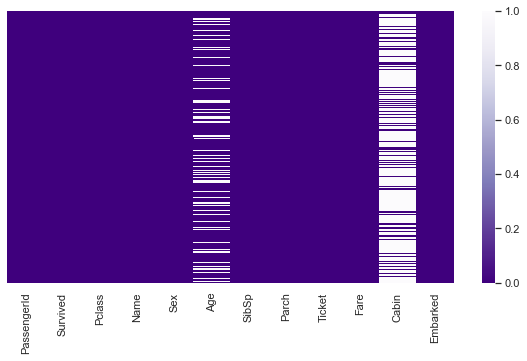

In [32]:
##Using heatmap in seaborn to visualize the null data
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='Purples_r')

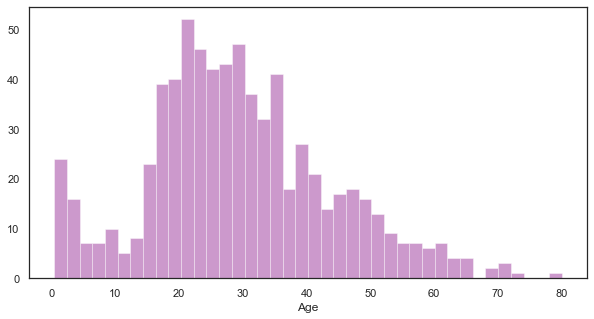

In [33]:
##Visualizing the distribution of age of passengers on-board
sns.set_style('white')
sns.distplot(titanic['Age'], color='purple',kde=False, bins=40)

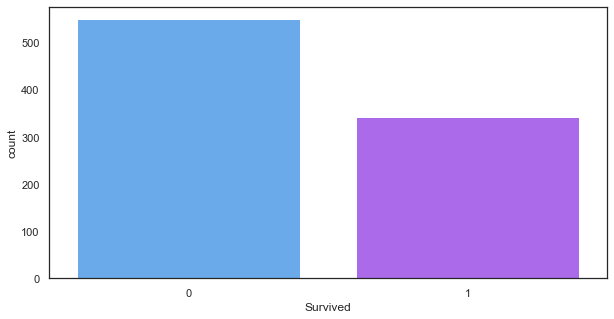

In [38]:
##Exploring data for the number of survivors using countplot
sns.set_style('white')
sns.countplot(x='Survived',data=titanic, palette='cool')

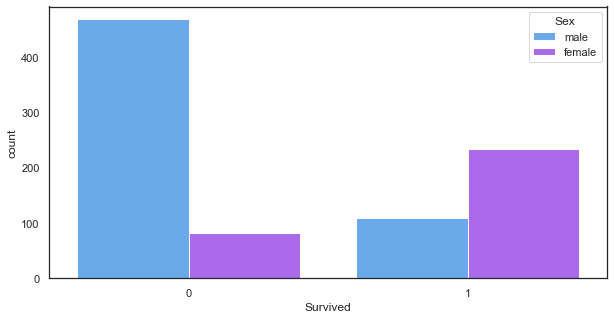

In [39]:
##Digging deeper into details of Survivors and Non-survivors (Sex, age, passenger class)
sns.set_style('white')
sns.countplot(x="Survived", hue='Sex', data=titanic, palette='cool')

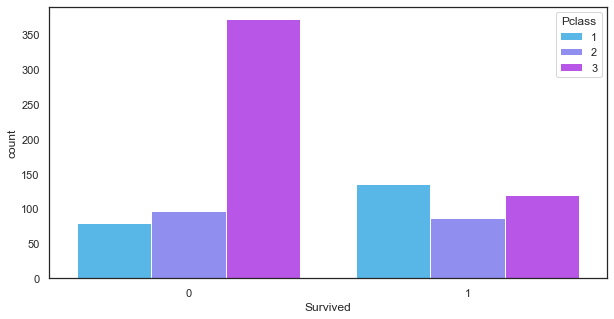

In [40]:
sns.set_style('white')
sns.countplot(x="Survived", hue='Pclass', data=titanic, palette='cool')

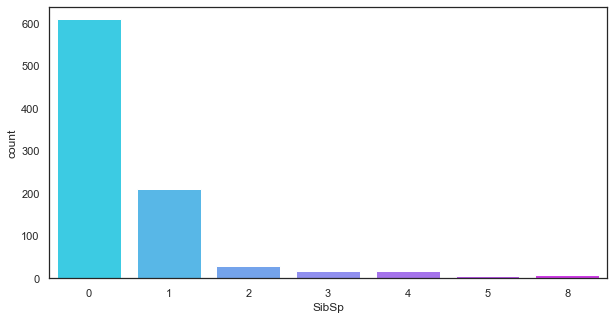

In [41]:
##Counting the number of passengers with Siblings/Spouse relationship
sns.set_style('white')
sns.countplot(x='SibSp', data=titanic, palette='cool')

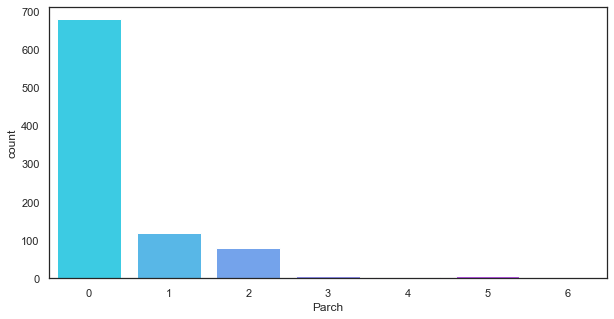

In [42]:
##Counting the number of passengers with Parent/Childres relationship
sns.set_style('white')
sns.countplot(x='Parch', data=titanic, palette='cool')

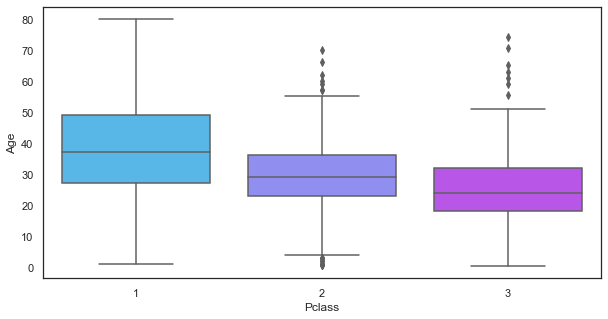

In [43]:
##Cleaning the data
sns.set_style('white')
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='cool')

In [44]:
##Defining impute function for the Age category so that it will not have null values
##Defining relationship between passenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 28
        else:
            return 24
    return Age

In [56]:
##Applying the impute function, dropping cabin column and checking the heat map
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age,axis=1)

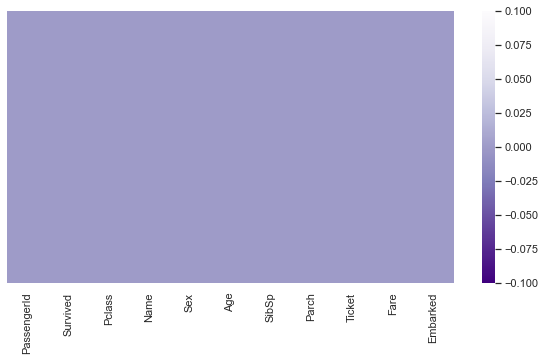

In [54]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='Purples_r')

In [57]:
##Checking the updated data set
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
##Checking the info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [59]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [60]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [61]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [62]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [63]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [64]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


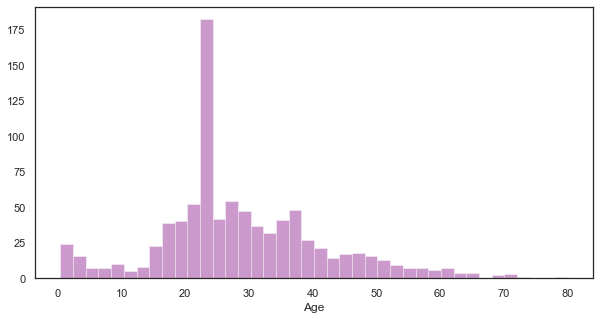

In [65]:
##Visualizing the distribution of age of passengers on-board
sns.set_style('white')
sns.distplot(titanic['Age'], color='purple',kde=False, bins=40)